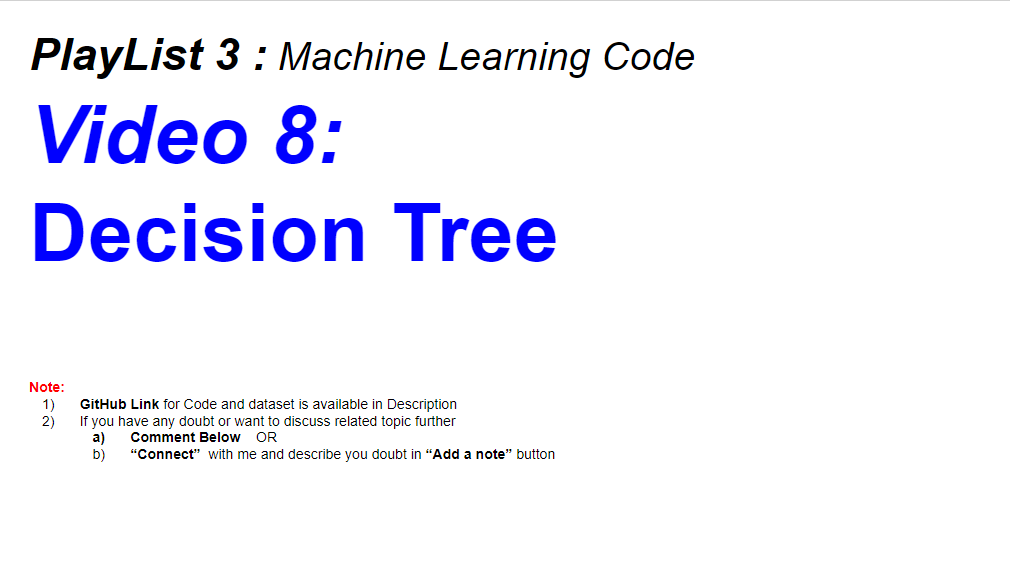

In [1]:
# importing
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from six import StringIO
from IPython.display import Image
import pydotplus

In [2]:
# reading "Red Wine Quality" data

import pandas as pd
df = pd.read_csv('winequality-red.csv')
# Download Weblink : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Input variables :
The data set consists following Input variables :

1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide
7 - total sulfur dioxide  
8 - density  
9 - pH   
10 - sulphates   
11 - alcohol

#### Output variables :
and the Output variable gives the quality of th wine based on the input variables: 

12 - quality (score between 0 and 10)

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Observation:
    # Count for each feature / column is "1599",
        # so, There are no Null values in any column

In [5]:
# Seperating Input and Output variables
X = df.drop(columns = 'quality')
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [6]:
y = df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [7]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 355)
# X,y ~ passing the above mentioned [X,y] dataset
# "test_size = 0.30" ~ allocating 70% data for training purpose
# "random_state = 355" ~ to maintain the same accuracy after multiple iterations

In [8]:
# fitting the model
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)
model

DecisionTreeClassifier(random_state=1234)

In [9]:
feature_name = list(X.columns)
feature_name # list of input features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [10]:
class_name = list(y_train.unique())
class_name
# unique values available in o/p column 'quality'

[7, 5, 3, 6, 4, 8]

In [11]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

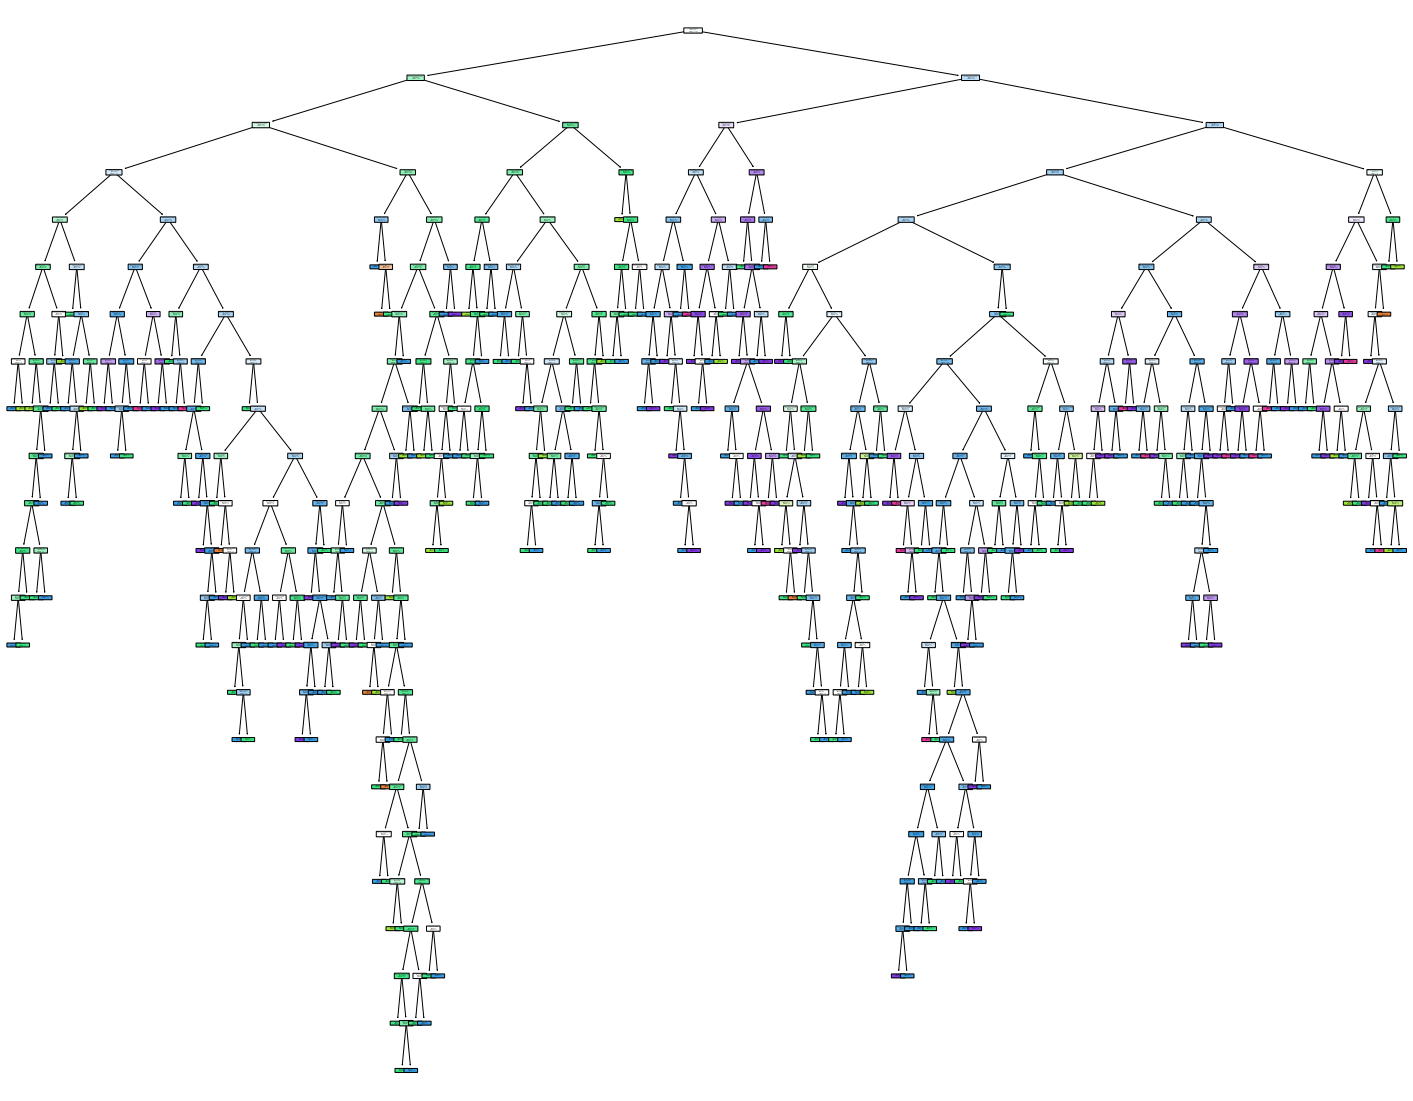

In [11]:
# Visualizing a Decision Tree using a Classifier (discrete variables, labels, etc.)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names= feature_name, rounded= True, filled=True)

In [12]:
# Visualizing the tree on the data without doing any pre-processing

# create a dot_file which stores the tree structure
from sklearn.tree import export_graphviz
dot_df = export_graphviz(clf,feature_names= feature_name, rounded= True, filled=True)

# Draw graph
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_df)
graph.write_png("myTree.png")

# Show graph
Image(graph.create_png())



InvocationException: Program terminated with status: 1. stderr follows: 'C:\Users\Kapil' is not recognized as an internal or external command,
operable program or batch file.


Let's understand the above tree:


<img src="tree_explain.PNG" width="300">

* the first value indicates the column and the condition on which the root node was selected and further will be splitted
* the second value gives the gini impurity of the selected node
* samples gives the number of observations at that point of time present in the node
* value within the square brackets represents number of observations present in each class(output) i.e. in the above given figure, 
    
    8 observations are in class 1, 
    
    38 in class 2 , 
    
    468 in class 3 and so on.

Then  the split was made on the basis of given condition.


In [12]:
# calculating the Score (~ Model's Accuracy)   for TRAINning dataset
clf.score(X_train,y_train)
# Accuracy for TRAINing data should be 100% only,
        # as the model is learnt from TRAINing dataset

1.0

In [13]:
# calculating the Score (~ Model's Accuracy) for TESTing dataset
clf.score(X_test,y_test)

0.6291666666666667

In [14]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
693,9.0,0.480,0.32,2.8,0.084,21.0,122.0,0.99840,3.32,0.62,9.4
160,7.6,0.950,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6
612,7.5,0.640,0.00,2.4,0.077,18.0,29.0,0.99650,3.32,0.60,10.0
604,8.3,0.580,0.13,2.9,0.096,14.0,63.0,0.99840,3.17,0.62,9.1
376,11.5,0.450,0.50,3.0,0.078,19.0,47.0,1.00030,3.26,1.11,11.0
...,...,...,...,...,...,...,...,...,...,...,...
1255,6.1,0.640,0.02,2.4,0.069,26.0,46.0,0.99358,3.47,0.45,11.0
262,8.0,0.520,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.0
704,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7
1146,7.8,0.500,0.12,1.8,0.178,6.0,21.0,0.99600,3.28,0.87,9.8


In [15]:
# Single Prediction
# Lets try to calculate accuracy for any random single row
py_pred = clf.predict([[9.0, 0.480, 0.32, 2.8, 0.084, 21.0, 122.0, 0.99840, 3.32, 0.62, 9.4]])
py_pred #o/p prediction = 5

array([5], dtype=int64)

In [16]:
#o/p prediction = 5
    # matches with y_test data's 693rd row
y_test

693     5
160     5
612     6
604     6
376     6
       ..
1255    5
262     5
704     4
1146    6
1020    6
Name: quality, Length: 480, dtype: int64